reimplementation mnist example included with lasagne

In [1]:
import sys

sys.path.append('../../')

In [2]:
from models import Sequential
from datasets import load_mnist

X_train, y_train, X_val, y_val, X_test, y_test =load_mnist()

/Users/pvrancx/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [3]:
from lasagne.layers import DenseLayer, DropoutLayer
from lasagne.nonlinearities import rectify, softmax
from lasagne.objectives import categorical_crossentropy
from lasagne.updates import nesterov_momentum

import theano.tensor as T

#create the model
mlp = Sequential(input_shape=(None,)+X_train.shape[1:],input_var = T.tensor4('inputs'), 
                 output_var = T.ivector('targets'))
#add layers
mlp.add(DenseLayer,lambda1=1e-4,lambda2=1e-6,num_units=800,nonlinearity=rectify)
mlp.add(DropoutLayer,p=0.5)
mlp.add(DenseLayer,lambda1=1e-4,lambda2=1e-6,num_units=800,nonlinearity=rectify)
mlp.add(DropoutLayer,p=0.5)
mlp.add(DenseLayer,num_units=10,nonlinearity=softmax)

#set loss and optimizer and compile
mlp.compile(loss_fn = categorical_crossentropy,
              optimizer = nesterov_momentum, learning_rate=0.01, momentum=0.9)


In [4]:
#train network
mlp.fit(X_train,y_train,validation_data=(X_val,y_val),n_epochs=30)

Epoch 1 of 30 took 15.367s
  training loss:		4.292764
  validation loss:		3.688035
Epoch 2 of 30 took 15.184s
  training loss:		3.524820
  validation loss:		3.195416
Epoch 3 of 30 took 15.822s
  training loss:		3.049209
  validation loss:		2.770045
Epoch 4 of 30 took 15.608s
  training loss:		2.629874
  validation loss:		2.378201
Epoch 5 of 30 took 15.632s
  training loss:		2.257473
  validation loss:		2.034660
Epoch 6 of 30 took 15.777s
  training loss:		1.924495
  validation loss:		1.726153
Epoch 7 of 30 took 15.445s
  training loss:		1.626357
  validation loss:		1.453221
Epoch 8 of 30 took 15.605s
  training loss:		1.367554
  validation loss:		1.213249
Epoch 9 of 30 took 15.539s
  training loss:		1.148316
  validation loss:		1.014057
Epoch 10 of 30 took 15.457s
  training loss:		0.962189
  validation loss:		0.848227
Epoch 11 of 30 took 15.405s
  training loss:		0.810798
  validation loss:		0.709389
Epoch 12 of 30 took 16.168s
  training loss:		0.690414
  validation loss:		0.601147
E

accuracy: 0.9767


/Users/pvrancx/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


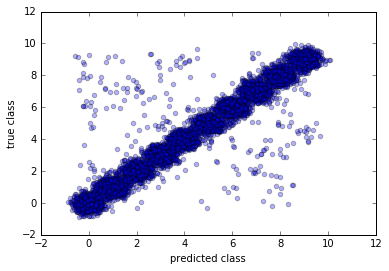

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pred = np.argmax(mlp.predict(X_test),axis=1)

print 'accuracy: '+str(np.mean(pred==y_test))

plt.xlabel('predicted class')
plt.ylabel('true class')

#add jitter (overlapping points)
plt.scatter(pred+np.random.randn(X_test.shape[0])*0.3,
            y_test+np.random.randn(X_test.shape[0])*0.3,alpha=0.3)

same experiment with convolutional neural network

In [6]:
from lasagne.init import GlorotUniform
from lasagne.layers import Conv2DLayer,MaxPool2DLayer
    
cnn = Sequential(input_shape=(None,)+X_train.shape[1:],
                 input_var = T.tensor4('inputs'),
                 output_var = T.ivector('targets'))

cnn.add(Conv2DLayer, num_filters=32, filter_size=(5, 5),
            nonlinearity= rectify,
            W=GlorotUniform())
cnn.add(MaxPool2DLayer, pool_size=(2, 2))
cnn.add(Conv2DLayer , num_filters=32, filter_size=(5, 5),
            nonlinearity= rectify)           
cnn.add(MaxPool2DLayer, pool_size=(2, 2))
cnn.add(DropoutLayer, p=.5)
cnn.add(DenseLayer, num_units=256, nonlinearity= rectify)
cnn.add(DropoutLayer, p=.5)
cnn.add(DenseLayer, num_units=10, nonlinearity= softmax)
                 
cnn.compile(loss_fn = categorical_crossentropy,
              optimizer = nesterov_momentum, learning_rate=0.01, momentum=0.9) 

In [ ]:
cnn.fit(X_train,y_train,validation_data=(X_val,y_val),n_epochs=30)

Epoch 1 of 30 took 80.127s
  training loss:		0.679579
  validation loss:		0.130208
Epoch 2 of 30 took 79.323s
  training loss:		0.223086
  validation loss:		0.092622
Epoch 3 of 30 took 78.921s
  training loss:		0.167608
  validation loss:		0.064594
Epoch 4 of 30 took 79.335s
  training loss:		0.135933
  validation loss:		0.056507
Epoch 5 of 30 took 79.554s
  training loss:		0.119248
  validation loss:		0.049017
Epoch 6 of 30 took 79.099s

accuracy: 0.9937


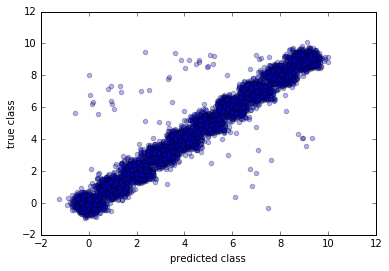

In [33]:
pred = np.argmax(cnn.predict(X_test),axis=1)

print 'accuracy: '+str(np.mean(pred==y_test))

plt.xlabel('predicted class')
plt.ylabel('true class')

#add jitter (overlapping points)
plt.scatter(pred+np.random.randn(X_test.shape[0])*0.3,
            y_test+np.random.randn(X_test.shape[0])*0.3,alpha=0.3)